# Goal:
The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop oﬀ and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

# Challenge Description
You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

* The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page.
* From the home page, the user can perform a search and land on the search page.
* From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.
* If she does decide to buy, she ends up on the conﬁrmation page

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Speciﬁcally, she is interested in :

A full picture of funnel conversion rate for both desktop and mobile
Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

# Load Data Set
All the tables refer to only the user ﬁrst experience on the site.

"user_table" - info about the user
"home_page_table" - Users who landed on the home page
"search_page_table" - Users who landed on the search_page
"payment_page_table" - Users who landed on the payment_page
"payment_confirmation_table" - Users who landed on the payment_confirmation_table. That is, these are the users who bought the product.

# Analysis

In [80]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
user=pd.read_csv('user_table.csv')
home_page=pd.read_csv('home_page_table.csv')
search_page=pd.read_csv('search_page_table.csv')
payment_page=pd.read_csv('payment_page_table.csv')
payment_confirmation=pd.read_csv('payment_confirmation_table.csv')


In [25]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [26]:
home_page.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [27]:
search_page.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [28]:
len(user['user_id'].unique())==len(home_page['user_id'].unique())

True

check the uniqueness of user_id in user_table and uniqueness of user_id in home_page before merge the table

In [44]:
data = pd.merge(user,home_page,on='user_id', how='left')
data.head()

,user_id,date,device,sex,page
0,450007,2015-02-28,Desktop,Female,home_page
1,756838,2015-01-13,Desktop,Male,home_page
2,568983,2015-04-09,Desktop,Male,home_page
3,190794,2015-02-18,Desktop,Female,home_page
4,537909,2015-01-15,Desktop,Male,home_page


In [46]:
data1=pd.merge(data,search_page,on='user_id', how='left').rename(columns={'page_x':'home_page','page_y':'search_page'})
data2=pd.merge(data,payment_page,on='user_id', how='left').rename(columns={'page':'payment_page'})
data3=pd.merge(data2,payment_confirmation,on='user_id',how='left').rename(columns={'page':'confirm_page'})



In [35]:
data3.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirm_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [69]:
percent_homepage_to_search=data3['search_page'].notnull().sum()/len(data3)
print("percent_home_page_retention_to_search_page: {}%".format(percent_homepage_to_search*100))

percent_homepage_to_payment=round(data3['payment_page'].notnull().sum()/len(data3),4)
print("percent_home_page_retention_to_payment_page: {}%".format(percent_homepage_to_payment*100))

percent_homepage_to_confirm=round(data3['confirm_page'].notnull().sum()/len(data3),4)
print("percent_home_page_retention_to_payment_confirm_page: {}%".format(percent_homepage_to_confirm*100))

percent_home_page_retention_to_search_page: 50.0%
percent_home_page_retention_to_payment_page: 6.67%
percent_home_page_retention_to_payment_confirm_page: 0.5%


From the home page, only half percent of users perform a search and land on the search page.


In [73]:
percent_search_to_payment=round(data3['payment_page'].notnull().sum()/data3['search_page'].notnull().sum(),4)
print("percent_search_page_retention_to_payment_page: {}%".format(percent_search_to_payment*100))

percent_search_to_confirm=round(data3['confirm_page'].notnull().sum()/data3['search_page'].notnull().sum(),4)
print("percent_search_page_retention_to_confirm_page: {}%".format(percent_search_to_confirm*100))

percent_payment_to_confirm=round(data3['confirm_page'].notnull().sum()/data3['payment_page'].notnull().sum(),4)
print("percent_payment_page_retention_to_confirm_page: {}%".format(percent_payment_to_confirm*100))

percent_search_page_retention_to_payment_page: 13.34%
percent_search_page_retention_to_confirm_page: 1.0%
percent_payment_page_retention_to_confirm_page: 7.5%


From the search page, only 13.3% of users will get to the payment page. And only 6.67% of users from the home page to payment page. From the payment page, only 7.5% of users who visited payment page finally confirmed the payment.

## Funnel conversion rate for both desktop and mobile

In [76]:
retention=['home_page to search_page','search_page to payment_page','payment_page to confirm_page']
conversion_rate=[percent_homepage_to_search,percent_search_to_payment,percent_payment_to_confirm]
funnel_conversion_rate = pd.DataFrame(zip(retention,conversion_rate),columns=['retention','conversion_rate'])

In [77]:
funnel_conversion_rate

,retention,conversion_rate
0,home_page to search_page,0.5000
1,search_page to payment_page,0.1334
2,payment_page to confirm_page,0.0750


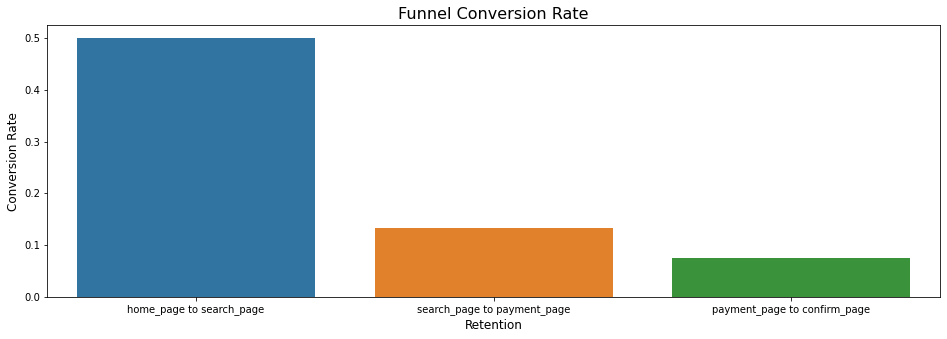

In [84]:
fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x='retention',y='conversion_rate',data=funnel_conversion_rate)
ax.set_title('Funnel Conversion Rate',fontsize=16)
ax.set_xlabel('Retention',fontsize=12)
ax.set_ylabel('Conversion Rate',fontsize=12)
plt.show()

In [128]:
from plotly import graph_objects as go
fig = go.Figure(go.Funnelarea(
    text = ["Home Page","Search", "Payment Page", "Confirmation Page"],
    values = [len(user)-len(search_page), len(search_page)-len(payment_page), len(payment_page)-len(payment_confirmation), len(payment_confirmation)]
    ,title='Funnel Analysis'))
fig.show()


## Conversion of Different Device Contrast:

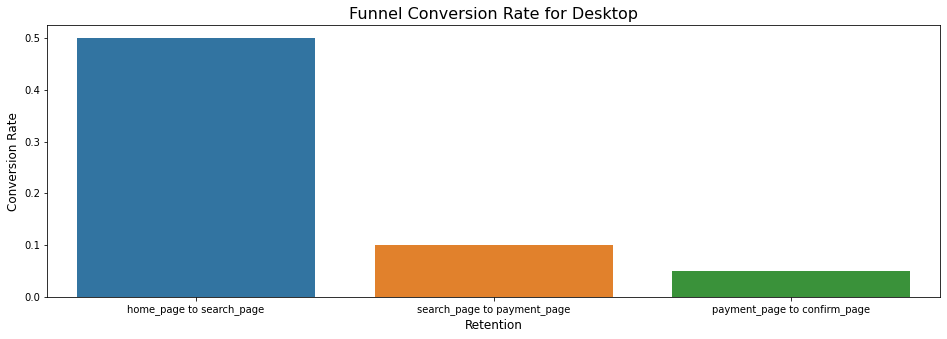

In [130]:
percent_homepage_to_search_desktop=data3[data3['device']=='Desktop']['search_page'].notnull().sum()/len(data3[data3['device']=='Desktop'])
percent_search_to_payment_desktop=round(data3[data3['device']=='Desktop']['payment_page'].notnull().sum()/data3[data3['device']=='Desktop']['search_page'].notnull().sum(),4)
percent_payment_to_confirm_desktop=round(data3[data3['device']=='Desktop']['confirm_page'].notnull().sum()/data3[data3['device']=='Desktop']['payment_page'].notnull().sum(),4)

retention=['home_page to search_page','search_page to payment_page','payment_page to confirm_page']
conversion_rate_desktop=[percent_homepage_to_search_desktop,percent_search_to_payment_desktop,percent_payment_to_confirm_desktop]
funnel_conversion_rate_desktop = pd.DataFrame(zip(retention,conversion_rate_desktop),columns=['retention','conversion_rate_desktop'])

fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x='retention',y='conversion_rate_desktop',data=funnel_conversion_rate_desktop)
ax.set_title('Funnel Conversion Rate for Desktop',fontsize=16)
ax.set_xlabel('Retention',fontsize=12)
ax.set_ylabel('Conversion Rate',fontsize=12)
plt.show()

home_page_desktop=data3[data3['device']=='Desktop']['home_page'].notnull().sum()
search_page_desktop= data3[data3['device']=='Desktop']['search_page'].notnull().sum()
payment_page_desktop=data3[data3['device']=='Desktop']['payment_page'].notnull().sum()
confirm_page_desktop=data3[data3['device']=='Desktop']['confirm_page'].notnull().sum()

In [139]:
fig = go.Figure(go.Funnelarea(
    text = ["Home Page","Search", "Payment Page", "Confirmation Page"],
    values = [home_page_desktop-search_page_desktop, search_page_desktop-payment_page_desktop, 
              payment_page_desktop-confirm_page_desktop
              , confirm_page_desktop]
    ,title='Funnel Analysis for desktop'))
fig.show()


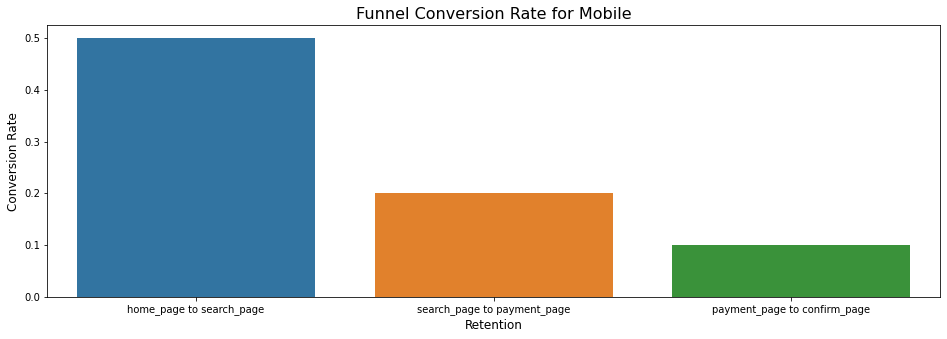

In [133]:
percent_homepage_to_search_Mobile=data3[data3['device']=='Mobile']['search_page'].notnull().sum()/len(data3[data3['device']=='Mobile'])
percent_search_to_payment_Mobile=round(data3[data3['device']=='Mobile']['payment_page'].notnull().sum()/data3[data3['device']=='Mobile']['search_page'].notnull().sum(),4)
percent_payment_to_confirm_Mobile=round(data3[data3['device']=='Mobile']['confirm_page'].notnull().sum()/data3[data3['device']=='Mobile']['payment_page'].notnull().sum(),4)

retention=['home_page to search_page','search_page to payment_page','payment_page to confirm_page']
conversion_rate_Mobile=[percent_homepage_to_search_Mobile,percent_search_to_payment_Mobile,percent_payment_to_confirm_Mobile]
funnel_conversion_rate_Mobile = pd.DataFrame(zip(retention,conversion_rate_Mobile),columns=['retention','conversion_rate_Mobile'])

fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x='retention',y='conversion_rate_Mobile',data=funnel_conversion_rate_Mobile)
ax.set_title('Funnel Conversion Rate for Mobile',fontsize=16)
ax.set_xlabel('Retention',fontsize=12)
ax.set_ylabel('Conversion Rate',fontsize=12)
plt.show()

home_page_Mobile=data3[data3['device']=='Mobile']['home_page'].notnull().sum()
search_page_Mobile= data3[data3['device']=='Mobile']['search_page'].notnull().sum()
payment_page_Mobile=data3[data3['device']=='Mobile']['payment_page'].notnull().sum()
confirm_page_Mobile=data3[data3['device']=='Mobile']['confirm_page'].notnull().sum()

In [134]:
fig = go.Figure(go.Funnelarea(
    text = ["Home Page","Search", "Payment Page", "Confirmation Page"],
    values = [home_page_Mobile-search_page_Mobile, search_page_Mobile-payment_page_Mobile, 
              payment_page_Mobile-confirm_page_Mobile
              , confirm_page_Mobile]
    ,title='Funnel Analysis for Mobile'))
fig.show()


The conversion rate of mobile is higher than desktop.

# Conclusion

In [141]:
device_comparison=pd.merge(funnel_conversion_rate_desktop,funnel_conversion_rate_Mobile,how='left',on='retention')
device_comparison

,retention,conversion_rate_desktop,conversion_rate_Mobile
0,home_page to search_page,0.5000,0.5
1,search_page to payment_page,0.1000,0.2
2,payment_page to confirm_page,0.0498,0.1


The conversion rate dropped significantly from home page to search page and from search page to payment page. The product team should focus on how to improve the content on the search page.

Mobile users have a higher conversion rate than desktop users.